In [138]:
!pip install tensorflow
!pip install opencv-python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image

### Set up and Preprocessing 

In [2]:
train_dir=r'C:\Users\hp\OneDrive\Desktop\CNN_practice\train'
test_dir=r'C:\Users\hp\OneDrive\Desktop\CNN_practice\test_1'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_gen=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 26240 images belonging to 2 classes.


### Model Training 

In [4]:
K.clear_session()# Clear last session
model=Sequential()

Neural Networks

In [5]:
# Convolutional block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())  # Normalize after Conv2D
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization

# Convolutional block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization

# Convolutional block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization

# Convolutional block 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Dropout for regularization


# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,680,449 (36.93 MB)

 Trainable params: 9,679,745 (36.93 MB)

 Non-trainable params: 704 (2.75 KB)

In [6]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3),metrics=['accuracy'])

In [7]:
history = model.fit(train_gen,steps_per_epoch=train_gen.samples//30,epochs=30,validation_data=test_gen,validation_steps=test_gen.samples//30)

Epoch 1/30


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


833/833 ━━━━━━━━━━━━━━━━━━━━ 1371s 2s/step - accuracy: 0.5841 - loss: 0.7266 - val_accuracy: 0.7800 - val_loss: 0.4768
Epoch 2/30
417/833 ━━━━━━━━━━━━━━━━━━━━ 8:08 1s/step - accuracy: 0.7746 - loss: 0.4765

C:\Users\hp\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


833/833 ━━━━━━━━━━━━━━━━━━━━ 677s 812ms/step - accuracy: 0.7818 - loss: 0.4659 - val_accuracy: 0.8203 - val_loss: 0.4005
Epoch 3/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 1219s 1s/step - accuracy: 0.8164 - loss: 0.4014 - val_accuracy: 0.7882 - val_loss: 0.4354
Epoch 4/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 568s 682ms/step - accuracy: 0.8582 - loss: 0.3211 - val_accuracy: 0.8313 - val_loss: 0.3981
Epoch 5/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 1121s 1s/step - accuracy: 0.8761 - loss: 0.2942 - val_accuracy: 0.9017 - val_loss: 0.2478
Epoch 6/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 556s 667ms/step - accuracy: 0.8927 - loss: 0.2533 - val_accuracy: 0.7452 - val_loss: 0.7064
Epoch 7/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 1303s 2s/step - accuracy: 0.9057 - loss: 0.2329 - val_accuracy: 0.8995 - val_loss: 0.2346
Epoch 8/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 622s 746ms/step - accuracy: 0.9108 - loss: 0.2160 - val_accuracy: 0.8777 - val_loss: 0.2880
Epoch 9/30
833/833 ━━━━━━━━━━━━━━━━━━━━ 1187s 1s/step - accuracy: 0.9171 - loss: 0.2150 - val

### Plot the Metrics 

### Save the model and make manual Predictions

In [14]:
model.save('cat_vs_dog_classifiers.h5')

C:\Users\hp\AppData\Local\Temp\ipykernel_1656\1502854957.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,acc,'bo',label='Training Accuracy',color='r')
C:\Users\hp\AppData\Local\Temp\ipykernel_1656\1502854957.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'bo',label='Training Loss',color='green')
C:\Users\hp\AppData\Local\Temp\ipykernel_1656\1502854957.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_loss,'b',label='Validation Loss',color='brown')


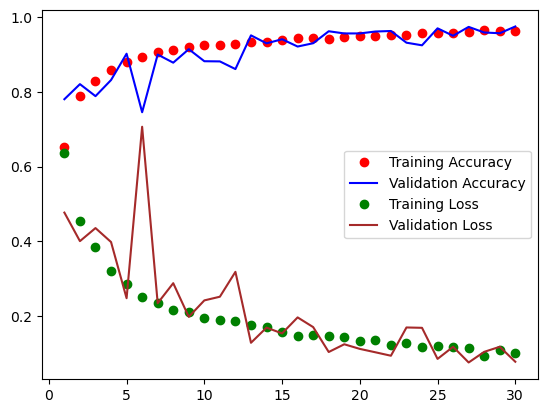

In [9]:
#Plot the metrics
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Accuracy',color='r')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend()

plt.plot(epochs,loss,'bo',label='Training Loss',color='green')
plt.plot(epochs,val_loss,'b',label='Validation Loss',color='brown')
plt.legend()


plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


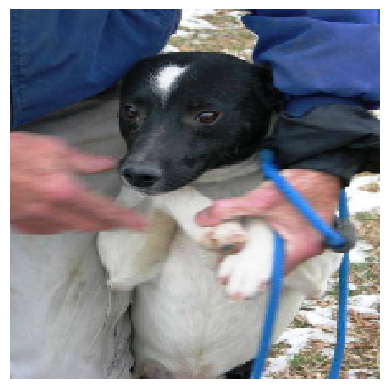

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


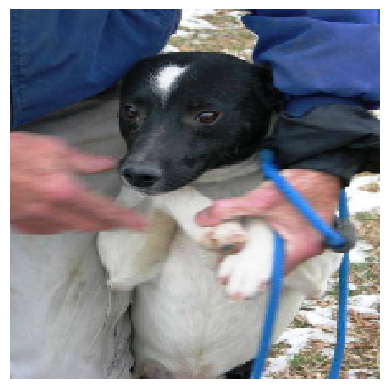

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


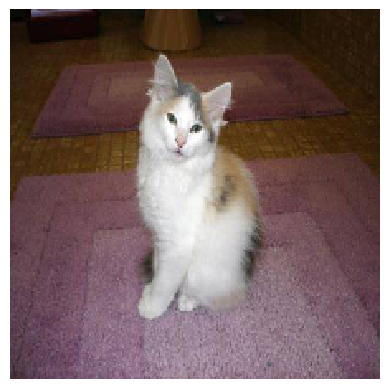

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


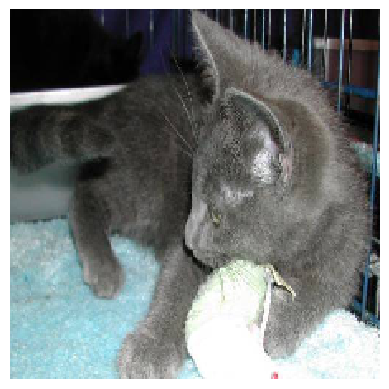

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


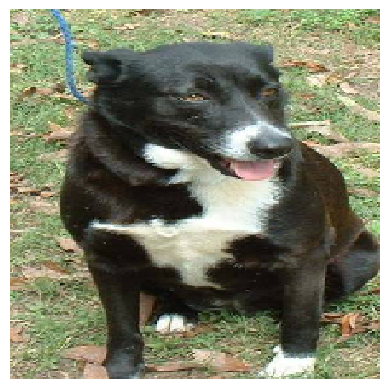

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


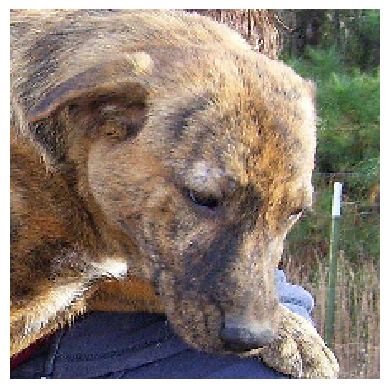

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


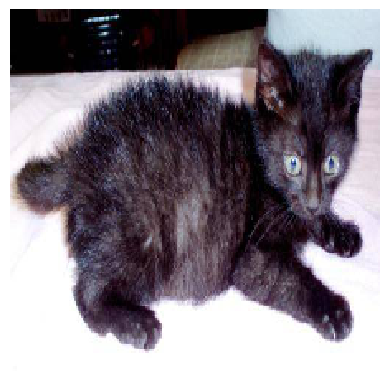

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


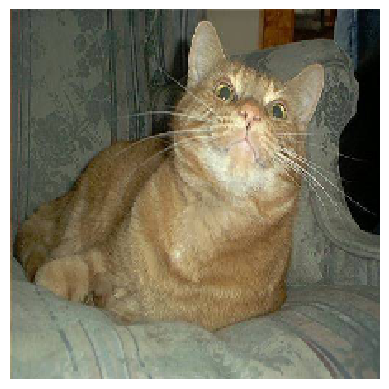

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


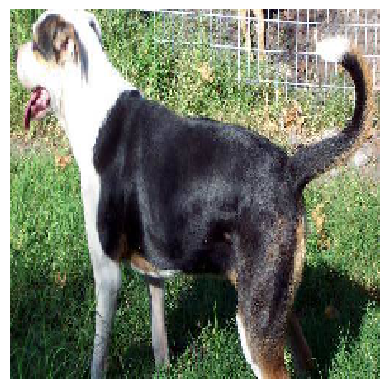

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


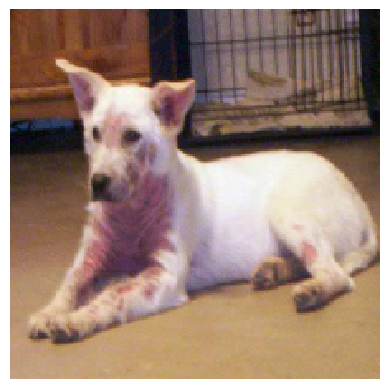

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


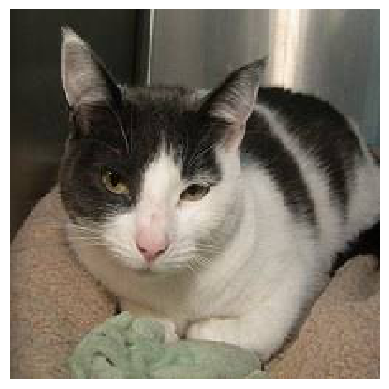

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


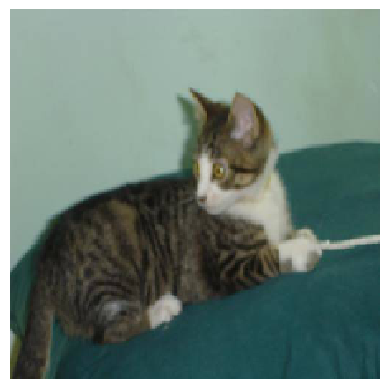

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


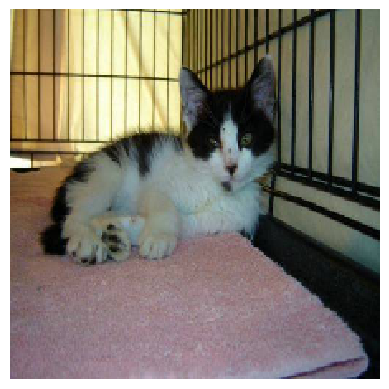

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


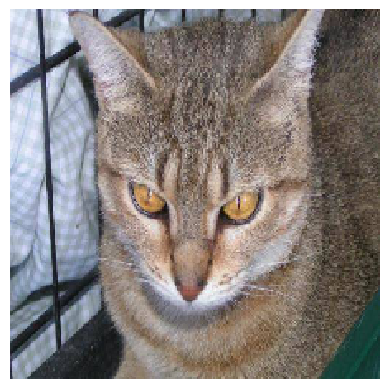

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


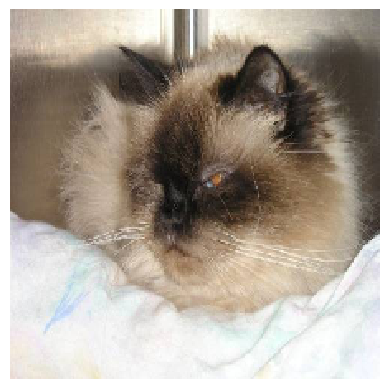

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


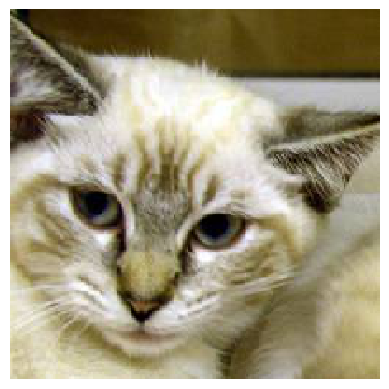

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


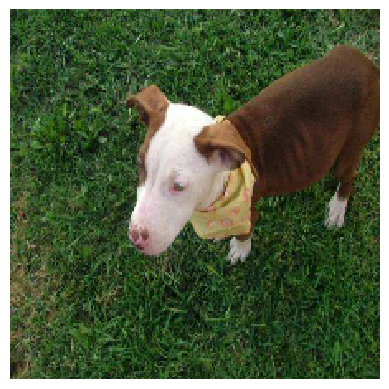

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


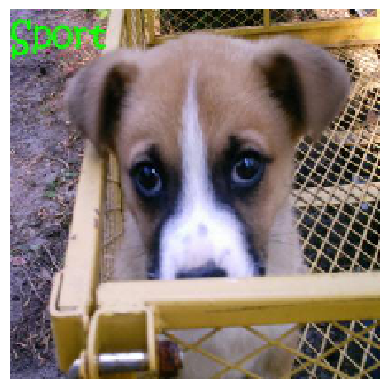

That was an image of a DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


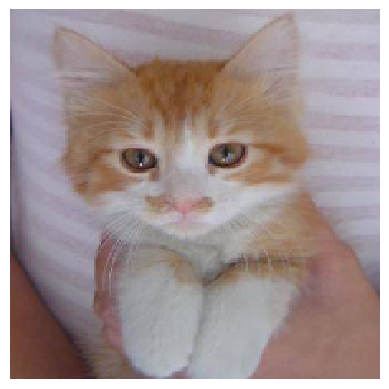

That was an image of a CAT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


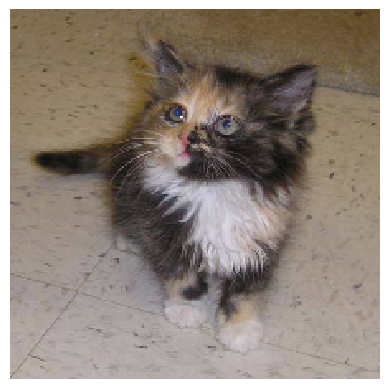

That was an image of a CAT


In [11]:
# Define test image path
test_path = r'C:\Users\hp\OneDrive\Desktop\CNN_practice\test_mixed'

# Get the first 20 image filenames in the directory
image_files = os.listdir(test_path)[:20]

# Loop through each image, load it, and display
for img_file in image_files:
    img_path = os.path.join(test_path, img_file)  # Full path to the image
    
    # Load the image and resize it to (224, 224)
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array
    img_arr = np.array(img)
    
    # Reshape the array to match the model input shape (1, 224, 224, 3)
    img_arr = img_arr.reshape(1, 224, 224, 3)
    
    # Make prediction using the model
    prediction = model.predict(img_arr)
    
    # Display the image
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')  # Hide the axis for better image display
    plt.show()
    
    # Use threshold for binary classification
    threshold = 0.5  # Assuming 0 = CAT and 1 = DOG, adjust the threshold as needed
    if prediction[0][0] <= threshold:
        print('That was an image of a CAT')
    else:
        print('That was an image of a DOG')

### Model Evaluation with test dataset

In [12]:
#Evaluate model's accuracy

# Load saved model
model = tf.keras.models.load_model('cat_vs_dog_classifiers.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)
print(f'test accuracy is: {test_accuracy:.4f}')
print(f'test Loss is: {test_loss:.4f}')

1312/1312 ━━━━━━━━━━━━━━━━━━━━ 410s 312ms/step - accuracy: 0.9727 - loss: 0.0764
test accuracy is: 0.9728
test Loss is: 0.0757


### Confusion Matrice 

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 491s 393ms/step


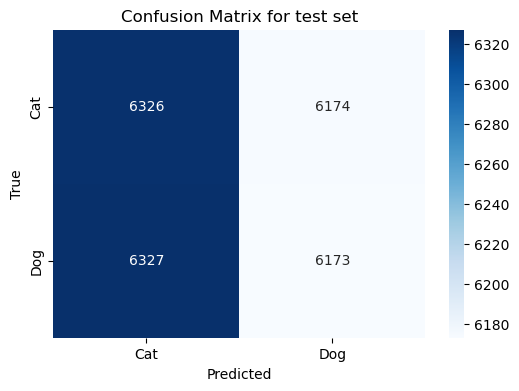

              precision    recall  f1-score   support

         Cat       0.50      0.51      0.50     12500
         Dog       0.50      0.49      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [15]:
 #Get the true labels from the test generator
true_labels = train_gen.classes

# Predict classes for test data
pred_probs = model.predict(train_gen)
pred_labels = np.where(pred_probs > 0.5, 1, 0)  # Convert probabilities to binary labels (0 or 1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for test set')
plt.show()

# Optionally, print classification report for precision, recall, and F1-score
print(classification_report(true_labels, pred_labels, target_names=['Cat', 'Dog']))

ImportError: cannot import name 'sequential' from 'tensorflow.keras' (C:\Users\hp\anaconda3\Lib\site-packages\keras\_tf_keras\keras\__init__.py)